# Simulation experiment

In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.ERROR)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [2]:
# generate continuous data
from snp_gen import snp_gen
from pysnptools.snpreader import SnpData, Bed

snpdata = snp_gen(fst=0.05, dfr=0.7, iid_count=5000, sid_count=10000, chr_count=10)
# insure file names are unique
import uuid
bed_fn = "data/5k_%s" % str(uuid.uuid4())[0:13]
Bed.write(snpdata, bed_fn)

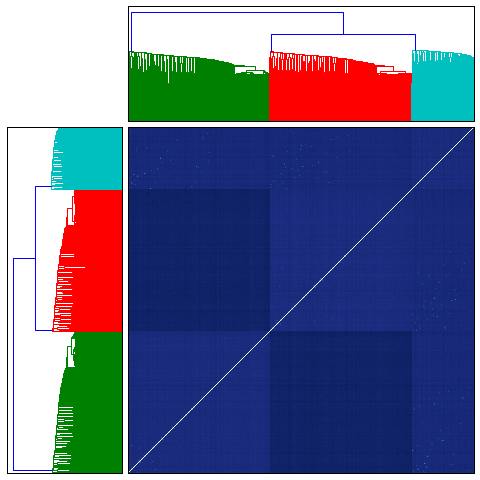

In [3]:
# visualize data set
from cluster_data import cluster_data
cluster_data(bed_fn)

In [4]:
# example definition of methods to compare
import numpy as np
from fastlmm.association import single_snp

def execute_lmm(test_snps, pheno, G0, covar):
    
    result = {}
    fs_result = {}
    
    result["full"] = single_snp(test_snps, pheno, G0=G0, covar=covar).sort(["Chr", "ChrPos"])["PValue"].as_matrix()

    return result, fs_result

def execute_linear_regression(test_snps, pheno, G0, covar):
    """
    implementation of linear regression with and without covariates
    """
    
    result = {}
    fs_result = {}
    
    # linear regression with causals as covariates
    from fastlmm.inference.linear_regression import f_regression_cov
    G_test = test_snps.read().standardize().val
    _, result["linreg"] = f_regression_cov(G_test.copy(), pheno["vals"].copy(), np.ones((len(pheno["vals"]),1)))
    _, result["linreg_cov_pcs"] = f_regression_cov(G_test.copy(), pheno["vals"].copy(), covar["vals"].copy())
    
    return result, fs_result

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


time taken to draw figure 0.174000024796
showing figure!


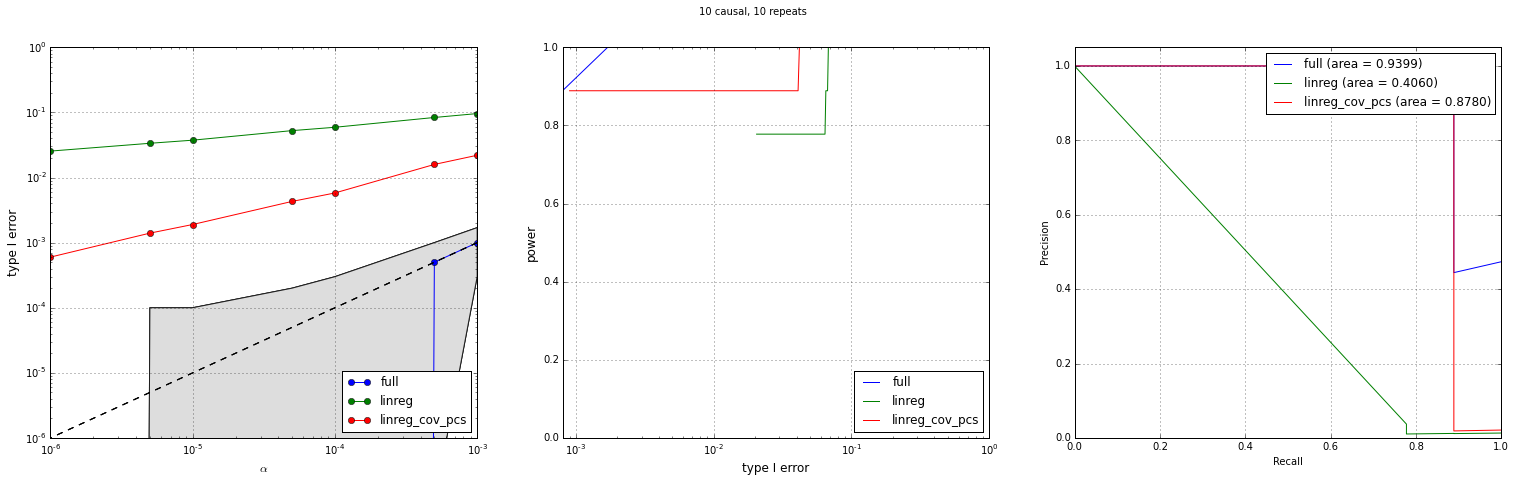

[{'method': 'full',
  'num_trials': 10000,
  'power': ([0.001,
    0.0005,
    0.0001,
    5e-05,
    1e-05,
    5e-06,
    1e-06,
    5e-07,
    1e-07,
    5e-08,
    1e-08],
   array([ 1.        ,  0.88888889,  0.88888889,  0.88888889,  0.77777778,
           0.77777778,  0.77777778,  0.77777778,  0.66666667,  0.66666667,
           0.66666667])),
  'prc': (array([ 0.47368421,  0.44444444,  0.47058824,  0.5       ,  0.53333333,
           0.57142857,  0.61538462,  0.66666667,  0.72727273,  0.8       ,
           0.88888889,  1.        ,  1.        ,  1.        ,  1.        ]),
   array([ 1.        ,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
           0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
           0.88888889,  0.88888889,  0.77777778,  0.66666667,  0.        ]),
   0.93989603638726438),
  'roc': (array([ 0.    ,  0.    ,  0.    , ...,  0.9998,  0.9999,  1.    ]),
   array([ 0.66666667,  0.77777778,  0.88888889, ...,  1.        ,
           1.    

In [5]:
from fastlmm.util.runner import Local
from semisynth_simulations import run_simulation
out_prefix = "results/tmp_result_"
description = "simulation"

num_causals = 10
num_repeats = 10
num_pcs = 5

#from methods import execute_lmm, execute_linear_regression, execute_dual_fs, execute_fs
methods = [execute_lmm, execute_linear_regression]

run_simulation(bed_fn, out_prefix, methods, num_causals, num_repeats, num_pcs, description, Local())

Because of rounding the actual number of iids is 1244 rather than the requested 1250
iid_count is 496 instead of 500 because of rounding
NaN beta value seen, may be due to an SNC (a constant SNP)
Because of rounding the actual number of iids is 1244 rather than the requested 1250
iid_count is 496 instead of 500 because of rounding
NaN beta value seen, may be due to an SNC (a constant SNP)
Because of rounding the actual number of iids is 1244 rather than the requested 1250
iid_count is 496 instead of 500 because of rounding
NaN beta value seen, may be due to an SNC (a constant SNP)
Because of rounding the actual number of iids is 1244 rather than the requested 1250
iid_count is 496 instead of 500 because of rounding
NaN beta value seen, may be due to an SNC (a constant SNP)
Because of rounding the actual number of iids is 1244 rather than the requested 1250
iid_count is 496 instead of 500 because of rounding
NaN beta value seen, may be due to an SNC (a constant SNP)
Because of rounding 

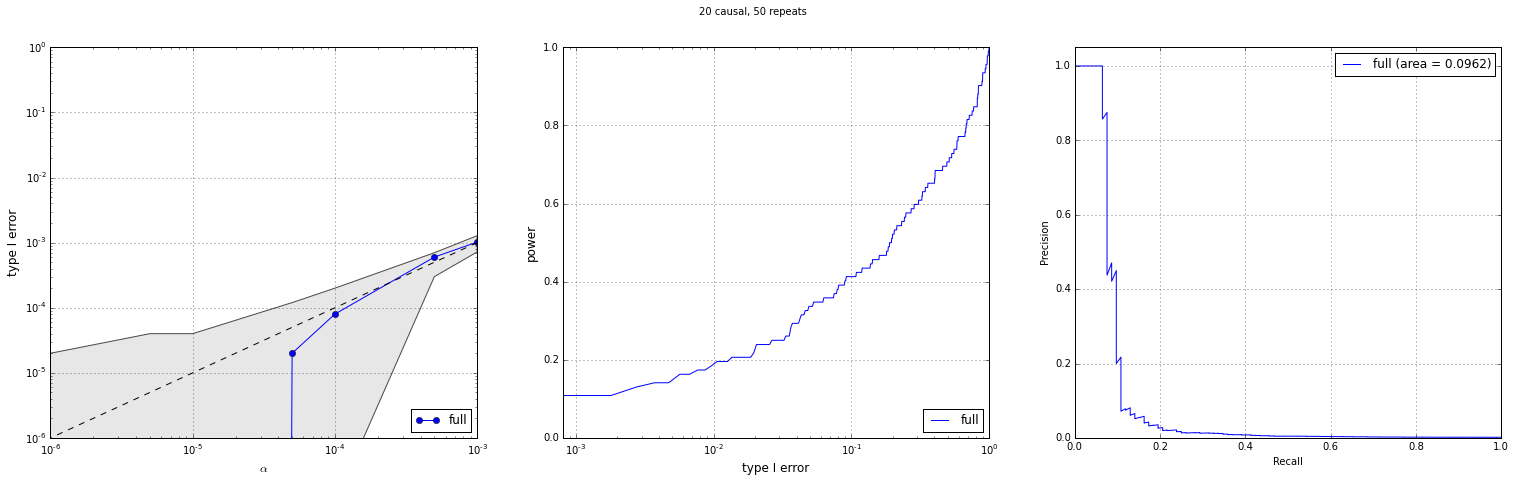

In [6]:
from GWAS_benchmark.semisynth_simulations import simulate_ascertained

snp_args = {"fst": 0.2, "dfr": 0.1, "sid_count": 10000, "maf_low":.05}
phenotype_args = {"genetic_var": 0.5, "noise_var": 0.5}
    # make this a tuple of function and kwargs
from GWAS_benchmark.methods import execute_lmm, execute_linear_regression
methods = [execute_lmm] #, execute_linear_regression]

prevalence = 0.2
num_causal = 20
num_repeats = 50
iid_count= 500
description = "ascertained"

res = simulate_ascertained(methods, prevalence, iid_count, num_causal, num_repeats, description, snp_args, phenotype_args)